In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random as rand
from matplotlib import image as img

For this lab I have provided a k-means implementation for you, as well as some sample code that uses the k-means implementation.  You will need to modify this code for your first exercise.  This code is adapted from https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py

In [2]:


class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500, normalize = False, R3 = False):
    #k is the number of clusters.  We set two different stopping criteria a tolerence 
    #(if the centers move less than the tolerence the iterations stop)  and a maximum
    # number of iterations
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.normalize = normalize

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, pick k points arbirarily from the available points
        for i in range(self.k):
            self.centroids[i] = data[np.random.randint(0,data.shape[0]-1)]
        

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid, then add that point to the cluster
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            
            #normalizes centroids
            if self.normalize == True:
                for v in self.centroids:
                    v = v / np.linalg.norm(v)

            isOptimal = True

            #check to see if the centroids have moved less than the tolerence
            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

    

Here is a worked example using the code above.

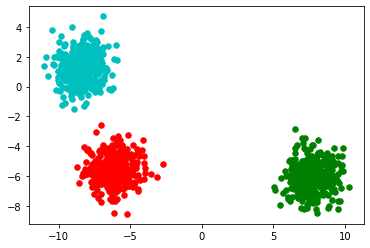

In [3]:
#example of using k-means class defined above

#create artifical data
X,Y= make_blobs(n_samples=1000, cluster_std=[1.0,1.0,1.0])

#initialize K-means class
km = K_Means(3)
#fit the data (in this case break into 3 clusters)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

# Plot the centroid centers
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

#plot the clusters (color, appropriately)
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()



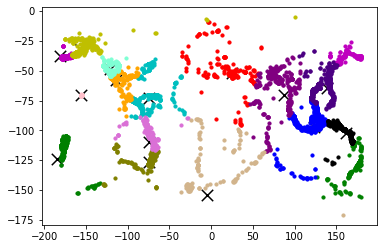

In [43]:
EdataLL = np.load("Earthquake_Coordinates.npy")
SphConv = []
for v in EdataLL:
  SphPt = [1]
  SphPt += [np.deg2rad(v[0])]
  SphPt += [np.deg2rad(90 - v[1])]
  SphConv += [SphPt]
EdataSph = np.array(SphConv)
#conversion to spherical coordinates
CartConv = []
for v in EdataSph:
  CartPt = []
  CartPt += [v[0]*np.cos(v[1])*np.sin(v[2])]
  CartPt += [v[0]*np.sin(v[1])*np.sin(v[2])]
  CartPt += [v[0]*np.cos(v[2])]
  CartConv += [CartPt]
EdataCart = np.array(CartConv)
km = K_Means(15, True)
km.fit(EdataCart)
SphConv = []
for i in range(len(km.centroids)):
  SphPt = [((km.centroids[i][0])**2 + (km.centroids[i][1])**2 + (km.centroids[i][2])**2)**0.5]
  SphPt += [np.arctan2(km.centroids[i][1],km.centroids[i][0])]
  SphPt += [np.arccos(km.centroids[i][2]/SphPt[0])]
  km.centroids[i] = np.array(SphPt)
for i in range(len(km.centroids)):
  LLPt = []
  LLPt += [np.rad2deg(km.centroids[i][1])/km.centroids[i][0]]
  LLPt += [np.rad2deg(km.centroids[i][2])/km.centroids[i][0]]
  km.centroids[i] = np.array(LLPt)
for i in range(len(km.centroids)):
  km.centroids[i][1] *= -1
for i in range(len(km.classes)):
  for j in range(len(km.classes[i])):
    SphPt = [((km.classes[i][j][0])**2 + (km.classes[i][j][1])**2 + (km.classes[i][j][2])**2)**0.5]
    SphPt += [np.arctan2(km.classes[i][j][1],km.classes[i][j][0])]
    SphPt += [np.arccos(km.classes[i][j][2]/SphPt[0])]
    km.classes[i][j] = np.array(SphPt)
for i in range(len(km.classes)):
  for j in range(len(km.classes[i])):
    LLPt = []
    LLPt += [np.rad2deg(km.classes[i][j][1])/km.classes[i][j][0]]
    LLPt += [np.rad2deg(km.classes[i][j][2])/km.classes[i][j][0]]
    km.classes[i][j] = np.array(LLPt)
for i in range(len(km.classes)):
  for j in range(len(km.classes[i])):
    km.classes[i][j][1] *= -1
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, color = 'k', marker = "x")
colors = 10*['r','g','b','c','m','y','k','orange','olive','pink','orchid','indigo','purple','aquamarine','tan']
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[0], features[1], color = color,s = 10)
plt.show()

In [75]:
def KMeanColorQuantifier(imgArray, k, S):
  assert np.shape(imgArray)[2] == 3, "imgArray must have shape (m,n,3)"
  assert S % 1 == 0, "S must be an integer"
  assert k % 1 == 0, "k must be an integer"
  m = np.shape(imgArray)[0]
  n = np.shape(imgArray)[1]
  midImg = np.reshape(imgArray, (m*n,3))
  km = KMeans(k)
  pixels = []
  for i in range(S):
    pixels += [midImg[rand.randint(0,m*n - 1)]]
  km.fit(pixels)
  centroids = km.cluster_centers_.astype(int)
  newImgInd = km.fit_predict(midImg)
  newImg = []
  for i in range(len(newImgInd)):
    newImg += [centroids[newImgInd[i]]]
  newImg = np.array(newImg)
  newImg = np.reshape(newImg,(m,n,3))
  

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  if sys.path[0] == '':


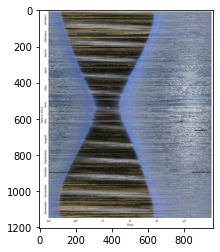

In [77]:
Image = img.imread("YearOfSky_Bassa_960.jpg")
KMeanColorQuantifier(Image, 10, 10)
plt.imshow(Image, cmap = "gray")